In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, arctan2, exp
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.io import wavfile, loadmat               
from IPython.display import Video, Audio
from Kildekode._05_Aliasing import *

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Sampling in the frequency domain

* **Emne AIS2201 - Signalbehandling**
* **Uke 36, 2023**
* **Underviser: Kai Erik Hoff**



## Tema

* Repetisjon aliasing og samplingsteoremet
* Aliasing i frekvensdomenet
* Rekonstruksjon


# Repetisjon sampling


<img src="Figurer/01_Introduksjon/Fig9_Ts.png" style="width: 80%; margin-left: 100px" />

* **Utfordring:**
    * Hvordan kan vi være sirke på at informasjon ikke går tapt mellom samplene?


## Repetisjon: Sampling av sinusformede signal

* Bruker samplingsfrekvensen for å finne uttrykk for en samplet sinusbølge.

\begin{align}
x(t) &= \cos(2\pi f \cdot t + \phi) \\
x[n] &= x(t)|_{t=n\cdot T_s} \\
&= \cos(2\pi f\cdot nT_s +\phi)\\
&= \cos\left(2\pi \frac{f}{f_s}\cdot n + \phi\right)
\end{align}

* Nytt begrep: *Normalisert Vinkelfrekvens*
    - også kalt *Digital Frekvens*
$$\hat{\omega} = 2\pi \frac{f}{f_s}$$

## Repetisjon: Hva skal til for å unngå tap av informasjon ved sampling?

* Med utgangspunkt i sinusbølger kan man formulere et kriterkie for vellykket rekonstruksjon:

    1. Alle signal kan dekomponeres til en sum av sinusbølger.
    2. Dersom har nok informasjon til å rekonstruere alle sinusbølgene individuelt, bør rekonstruksjon av et mer komplisert signal være mulig.
    3. Dersom den høyeste frekvenskomponenten kan rekonstrueres, kan alle de andre frekvenskomponentene rekonstrueres også.


* Hvilke begrensninger har vi for sampling av sinussignal?

## Interaktivt plot: sampling av sinussignal

In [1]:
aliasingDemo(fig_num=1);

NameError: name 'aliasingDemo' is not defined

## Repetisjon: Aliasing

* Når en sinusformet bølge med frekvens $f$ samples med samplingsfrekvens $f_s \leq 2\cdot f$, vil samplene "se ut" som et annet signal.
* Dette falske signalet er kjent som en alias.
* En alias av et signalkomponent er ofte umulig å adskille fra de delene av signalet som er samplet korrekt.

## Repetisjon: Nyquist Samplingsteorem

* Et analogt signal $x(t)$ som ikke inneholder frekvenskomponenter høyere enn $f_{max}$ kan rekonstrueres uten feil fra det samplede signalet $x[n] = x(n\cdot T_s)$ *kun* hvis samplingsfrekvensen $f_s =\frac{1}{T_s}$ er større enn $2\cdot f_{max}$.

## $$f_s > 2\cdot f_{max} = \text{Nyquist rate}$$

* Maksfrekvensen $\frac{f_s}{2}$ er kjent som *Nyquist Frekvensen*

# Kodeillustrasjon: chirp-signal

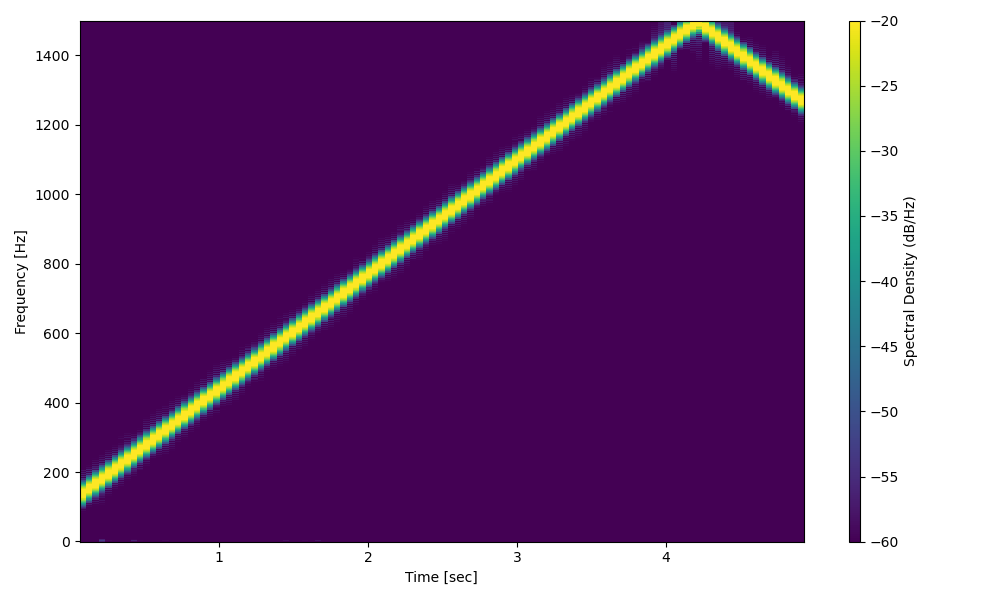

In [3]:
fs = 3000 # Samplet per second
T = 5 # Signalvarighet i seconds
t = np.linspace(0, T, int(T*fs), endpoint=False) # array of sample time values
x_t = sig.chirp(t, f0 = 110, t1=T, f1 = 1760)    # Lag en tone som gradvis øker i frekvens

# Her genereres og vises et spektrogram basert på det genererte chirp-signalet.
# Vi skal snakke om alle du forskjellige parametrene om et par uker, så ikke
# bli forskrekket om det ser helt gresk ut.
plt.close(2); plt.figure(2, figsize=(10,6))

f_axis, t_axis, Sxx = sig.spectrogram(x_t, fs,'hamming', 512, 384, 2048)
plt.pcolormesh(t_axis, f_axis, 10*np.log10(Sxx), vmax =-20, vmin = -60, shading='auto')
plt.colorbar(aspect=50, label=r'Spectral Density (dB/Hz)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout();plt.show()

Audio(x_t, rate=fs) # Spill av "x_t" til en Audio widget

<img src="Figurer/05_Sampling_og_Aliasing/Fig14_FreqFolding1.png" style="width: 80%">

# Sampling av båndbegrenset signal

* Dersom samplingsteoremet er oppfylt må signalet være *båndbegrenset* slik at $f_{max}<\frac{f_s}{2}$.
* Vi kaller bredden signalet okkuperer langs frekvensaksen for *båndbredden* ***B***

<img src="Figurer/05_Sampling_og_Aliasing/Fig9_SpectralSamling1.png" style="width: 90%">

# Periodisitet i frekvensdomenet

* Utvidet representasjon av et digitalt signal i frekvensdomenet gir periodisk frekvensinnhold der perioden er $2\pi$.
* Det båndbegrensede signalet får en serie ***spektrale kopier*** sentrert rundt $\hat{\omega} = k\cdot 2\pi$.
* Alle mulige spektrale kopier av et digitalt signal er "til stede" i signalets frekvensspekter.
    - Fourieranalyse av det digitale signalet vil gi utslag for alle disse kopiene

<img src="Figurer/05_Sampling_og_Aliasing/Fig10_SpectralSamling2.png" style="width: 90%">

# Rekonstruksjon

* Ideell rekonstruksjon tilbake til et tidskontinuerlig signal vil fjerne de spektrale kopiene.
<img src="Figurer/05_Sampling_og_Aliasing/Fig11_SpectralSamling2.png" style="width: 90%">

<img src="Figurer/05_Sampling_og_Aliasing/Fig11b_SpectralSamling3.png" style="width: 70%">

# Aliasing i frekvensdomenet

* Dersom samplingsfrekvensen er forl lav, vil de spektrale kopiene overlappe hverandre.
* I de overlappende sonene vil to forskjellige frekvenskomponenter samples til samme digitale frekvens.
<img src="Figurer/05_Sampling_og_Aliasing/Fig12_SpectralAliasing1.png" style="width: 90%">

# Aliasing i frekvensdomenet

* Alle disse verlappende frekvenskomponentene kan ha uforutsigbare konsekvenser, og enten kansellere ut hverandre eller legges sammen.
* Rekonstruksjon av opprinnelig signal ikke gjennomførbart.

<img src="Figurer/05_Sampling_og_Aliasing/Fig12_SpectralAliasing2.png" style="width: 90%">

# Frekvensfolding illustrert

<img src="Figurer/05_Sampling_og_Aliasing/Fig15_FreqFolding2.png" style="width: 80%">

## Demo: Aliasing og frekvensinnhold

Output()

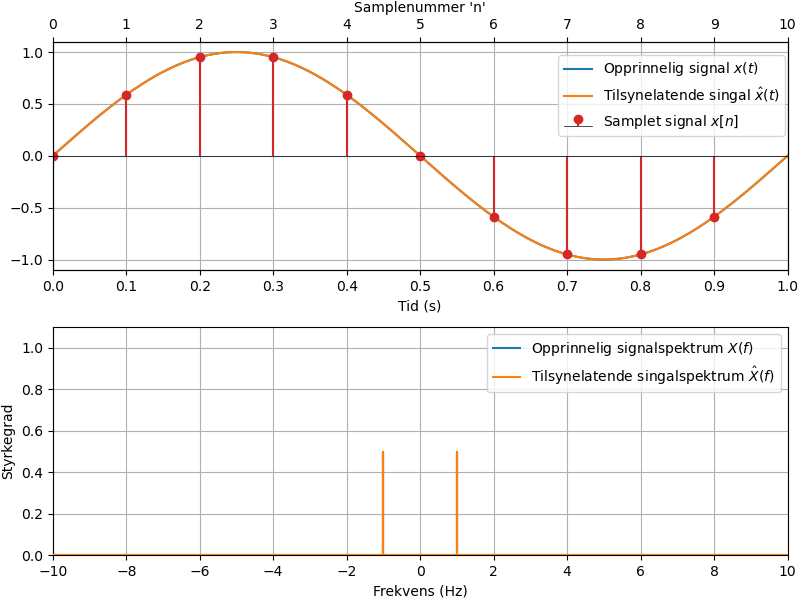

In [4]:
aliasingDemo2(fig_num=3)

## Regneeksempel 3: utregning av samplet signal
* Signalet $x(t) =\cos\left(2\pi \cdot 175 \cdot t + \frac{\pi}{3} \right) + \cos\left(2\pi \cdot 225 \cdot t + \frac{2\pi}{3} \right)$ samples med en samplingsfrekvens $f_s = 400 Hz$. 

    Finn et uttrykk for det samplede signalet $x[n]$.

### Visualisering av signalet fra regneeksempel 3:

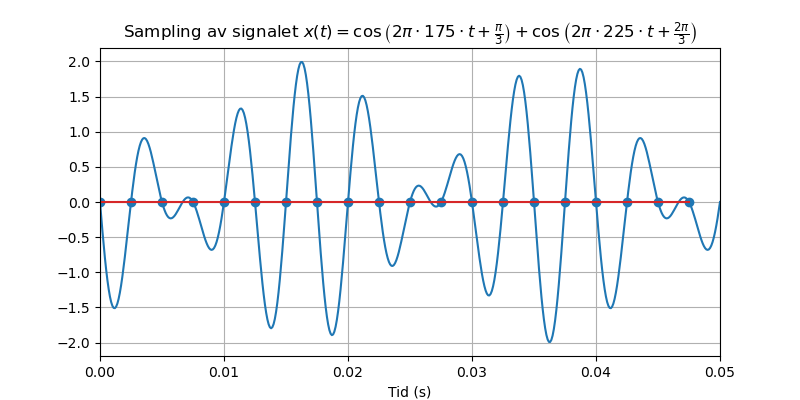

In [5]:
# "Analog" signalgenerasjon
T = 0.05
t = np.linspace(0, T, 501)
xt = cos(2*pi*175*t + pi/3) + cos(2*pi*225*t+2*pi/3)

# Digital signalgenerasjon
fs = 400
n = np.arange(0, int(T*fs))
t_n = n/fs
x_n = cos(2*pi*175*n/fs + pi/3) + cos(2*pi*225*n/fs + 2*pi/3)

# Vis begge i figur
plt.close(4); plt.figure(4, figsize=(8,4))
plt.plot(t, xt)
plt.stem(t_n, x_n)
plt.xlabel("Tid (s)")
plt.title(r"Sampling av signalet $x(t) = \cos\left(2\pi \cdot 175 \cdot t + \frac{\pi}{3} \right) + \cos\left(2\pi \cdot 225 \cdot t + \frac{2\pi}{3} \right)$")
plt.xlim([0, T])
plt.grid(True)

# Hvordan kan vi vite om aliasing skjer?

* Scenario: <br> Vi bruker en sonar til å bedømme avstand til en gjenstand under vann basert på det mottatte reflekterte signalet $x(t)$, men får veldig mye usikkerhet i målingene. 
    * For å nøste opp i dette bruker frekvensanalyse for å produsere et plot av frekvensspekteret til $x(t)$

(0.0, 275.0)

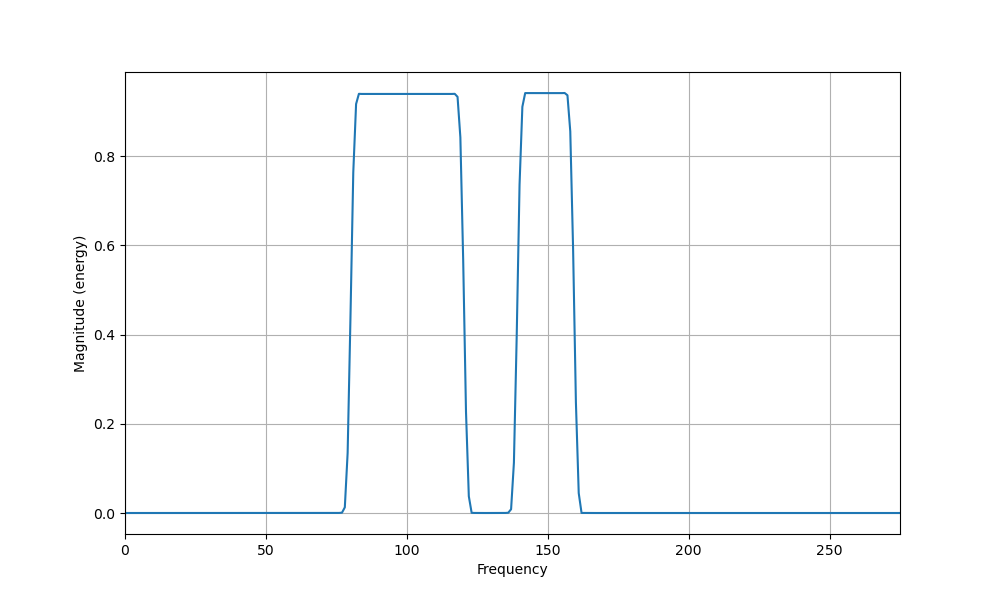

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#from Kildekode._05_Aliasing import x # Signalet x(t) som sonaren mottar

# Example signal for aliasing demo
def x(t): 
    B1 = 40 #Hz
    t_0 = (t[-1]-t[0])/9*4
    sig = (t[-1]-t[0])*B1*np.sinc(B1*(t-t_0))*(0.5-0.5*np.cos(2*np.pi*np.arange(len(t))/len(t)))*np.cos(2*pi*100*t)
    
    B2 = 20 #Hz
    t_0 = (t[-1]-t[0])/9*5
    sig += (t[-1]-t[0])*B2*np.sinc(B2*(t-t_0))*(0.5-0.5*np.cos(2*np.pi*np.arange(len(t))/len(t)))*np.cos(2*pi*400*t)
    
#     B3 = 25 #Hz
#     t_0 = (t[-1]-t[0])/9*3
#     sig += (t[-1]-t[0])*B2*np.sinc(B2*(t-t_0))*(0.5-0.5*np.cos(2*np.pi*np.arange(len(t))/len(t)))*np.cos(2*pi*500*t)
    return sig

fs =550
T = 1
t = np.linspace(0, T, fs*T)
echo = x(t)
plt.close(1);plt.figure(1, figsize=(10,6))
plt.magnitude_spectrum(echo, fs);
plt.grid(True)
plt.xlim([0, fs/2])

* Uten aliasing skal ikke en justering av samplingsfrekvens ha annen effekt på frekvensspekteret til signalet $x(t)$ enn at x-aksen dekker et større eller mindre frekvensområde.
* *Med* aliasing vil vi se at frekvenskomponenter flytter på seg relativ til hverandre når samplingsfrekvensen justeres.

# Oppsummering del 1 av timen:

1. Signal med frekvensinnhold over nyquist-frekvensen $\frac{f_s}{2}$ vil produsere en "Alias" innenfor nyquist-frekvensen
2. En slik alias kan interfere med deler av signalet som befinner seg innenfor nyquist-grensen.
3. Å separere overlappende alias fra basisbånd-signal etter sampling er ikke matematisk mulig uten tilleggs-informasjon.

# Anti-aliasing filter
* Vi trenger en måte å gardere mot mulig høyfrekvent signalinnhold utenfor Nyqist-frekvensen.
* Et *analogt* filter i forkant av A/D omformeren kan brukes til å dempe høyfrekvent signalinnhold før sampling.

<img src="Figurer/05_Sampling_og_Aliasing/Fig16_AntiAliasing1.png" style="width: 80%; margin-left: 100px%">

# Ideelle filtre

* Omtales ofte som "brick wall"-filter-
* Signalkomponenter i passbåndet passerer helt uendret.
* Signalkomponenter i stoppbåndet blokkeres 100%.
* Kantfrekvens $f_c$ der passbåndet stopper og stoppbåndet starter.

<img src="Figurer/05_Sampling_og_Aliasing/Fig17_AntiAliasing2.png" style="width: 70%; margin-left: 100px%">

# Praktiske analoge filtre
        
<div style="width: 100%;">
    <img src="Figurer/05_Sampling_og_Aliasing/Fig18_AntiAliasing3.png" style="float: right; width: 40%" />
    <div style="width: 50%">
    <ul>
    <li>I praksis vil et filter velges ut i fra hvor store avvik fra det ideelle filteret man kan tillate.</li>
    <li>Passbåndet vil alltid endre signalet <i>litt</i>.</li>
    <ul>            
        <li>Hvor mye kan vi tillate? </li>
    </ul>
    <li>Stoppbåndet vil aldri dempe <b>alt</b> signalinnhold i stoppbåndet.</li>
    <ul>            
        <li>Hva kan vi regne som god nok dempingsfaktor?</li>
    </ul>
    </ul>
    </div>
</div> 

# Oversampling

* Ved å sample ved en høyere frekvens enn *Nyquist raten* $f_s = 2\cdot f_{max}$, kan vi legge inn en "sikkerhetsmargin".
* Gjør det mulig å bruke et ikke-ideelt anti-aliasing filter med gradvis "roll-off", og allikevel garantere at alle frekvenskomponenter som kan føre til aliasing har blitt dempet tilstrekkelig.
* Samplingsfrekvensen kan reduseres ved en senere anledning på "digital side" om ønskelig.

## Regneeksempel 4: oversampling

<div style="width: 110%;">
    <img src="Figurer/05_Sampling_og_Aliasing/Fig18_AntiAliasing3.png" style="float: right; width: 40%" />
    <div style="width: 50%">
    <ul>
        <li>Vi skal sample et signal $x(t)$, og er <i>kun</i> interessert i frekvensbåndet $0Hz\leq f < 500Hz$. </li>
        <li>For å unngå aliasing fra uønsket interferens i de andre frekvensområdene, benytter vi et *anti-aliasing filter* med $-3dB$ knekkfrekvens $f_c = 500Hz$ slik som vist i figuren. </li>
        <li>Det er et krav at alle de høye frekvensene som "foldes" ned til frekvensbåndet $0Hz \leq f < 500Hz$ skal være dempet minst $80dB$.
    </ul>
    </div>
</div> 

* Hva er den laveste samplingsfrekvensen vi kan bruke og fremdeles oppfylle kravene?

## Løsning regneeksempel 4:

<img src="Figurer/05_Sampling_og_Aliasing/Fig19_AntiAliasing4.png" style="width: 60%; margin-left: 100px%">

* Vi kan akseptere det røde frekvensbåndet, da signalinnholdet der ikke var av interesse.

# Praktisk Rekonstruksjon (D/A-omforming)

* Alle metoder for rekonstruksjon bygger på å erstatte en signalsample med en "pulsform"
* "Zero Order Hold" er en vanlig og ukomplisert tilnærming, spesielt for sanntidssystem.
    * Betyr i praksis "sett utgangsspenningen lik nåværende sampleverdi $x[n]$, og la stå til det kommer en ny sampleverdi".
* Uganssignalet blir en trappetrinns-approksimasjon
<img src="Figurer/05_Sampling_og_Aliasing/Fig20_ZOH.png" width="75%">

* En annen pulsform man kan bruke er en trekantpuls. I faglfeltet Diskrete Reguleringssystem er dette kjent som "First Order Hold" rekonstrkusjon.

# Matematisk modell
## $$ \hat{x}(t) = \sum_{n=-\infty}^{\infty} x[n] \cdot p(t-n T_s)$$

* der $p(t)$ er pulsformen til én firkantpuls: <br>
\begin{equation}
p(t) = 
\begin{cases}
1, & 0\leq t < T_s\\
0, \text{otherwise}
\end{cases}
\end{equation} <br>
    * alternativt: $p(t) = u(t) - u(t-T_s)$, der $u(t)$ er *enhetsstegfunksjonen* <br>
\begin{equation}
u(t) = 
\begin{cases}
1, & t \geq 0 \\
0, & t < 0
\end{cases}
\end{equation}

# Anti-imaging

* Kurven kan glattes ut ytterligere med et lavpassfilter.
    * Et slik filter kalles ofte et "anti-imgaging filter"
    
<img src="Figurer/05_Sampling_og_Aliasing/Fig21_AntiImaging.png" width="75%">

# DSP-systemer i "sanntid"

* Et "sanntidsystem" vil være f.eks. en mikrokontroller som oppdaterer en utgangsverdi med én gang den tar en ny sample. 
    * Et digitalt regulerignssystem er et slikt system
    
<img src="Figurer/05_Sampling_og_Aliasing/Fig22_ZOH2.png" width="75%">

* Gitt ideell sampling og rekonstruksjon med Zero Order Hold, vil DSP-systemet allikevel introdusere en tidsforsinkelse på $\Delta t = \frac{T_s}{2}$.
    * For operasjoner der tidsforsinkelser kan være kritiske (f.eks. reguleringssystemer) bør dette tas med i beregningene.

## Illustrasjon: Samplingsfrekvens og reguleringssystem


* Figuren viser hvordan ulike samplingsfrekvenser for et reguleringssystem kan påvirke fase-kurven til et bode-pot
<img src="Figurer/05_Sampling_og_Aliasing/Fig23_DiscreteControl.png" width="75%">

# Sampling av passbånd-signal

* Vi *kan* rekonstruere et høyfrekvens signal fra en alias.
    - Krever at signalet er *båndbegrenset* innenfor ét frekvensintervall $\frac{2f_c - B}{m} \geq f_s \geq \frac{2f_c  +B}{m}, \ \ \ \ \ m \in \mathbb{Z}$<br>
    der $B$ er *båndbredden* til signalet.
    - Med forkunnskaper om hvilken alias som er den "virkelige", kan denne velges ut ved rekonstruksjon.
* Denne prosessen er ofte referet til som "undersampling".

<img src="Figurer/05_Sampling_og_Aliasing/Fig24_Undersampling.png" width="65%">

# Undersampling nytteverdi?

* Enkoding av sub-bånd:
    * Et signal kan deles opp etter *frekvensinnhold* til ulike sub-bånd
    
<img src="Figurer/05_Sampling_og_Aliasing/Fig25_splitting.png" width="35%">

* Hver av de to sub-båndene kan representeres med halvparten av samplene til det opprinnelige signalet $x[n]$.


## Anvendelseseksempel: audiokompresjon
<img src="Figurer/05_Sampling_og_Aliasing/Fig26_AudioComp.png" width="75%">

# Spørsmål?
![](Figurer/digital_data.png)